In [46]:
# importing all the required libs

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline






from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



<hr>

In [47]:
# Loading Data
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [48]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Below is a quick stats overview of the features that have numerical datatypes.

In [50]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Training Dataset

##### Checking and cleaning null values 

<AxesSubplot:>

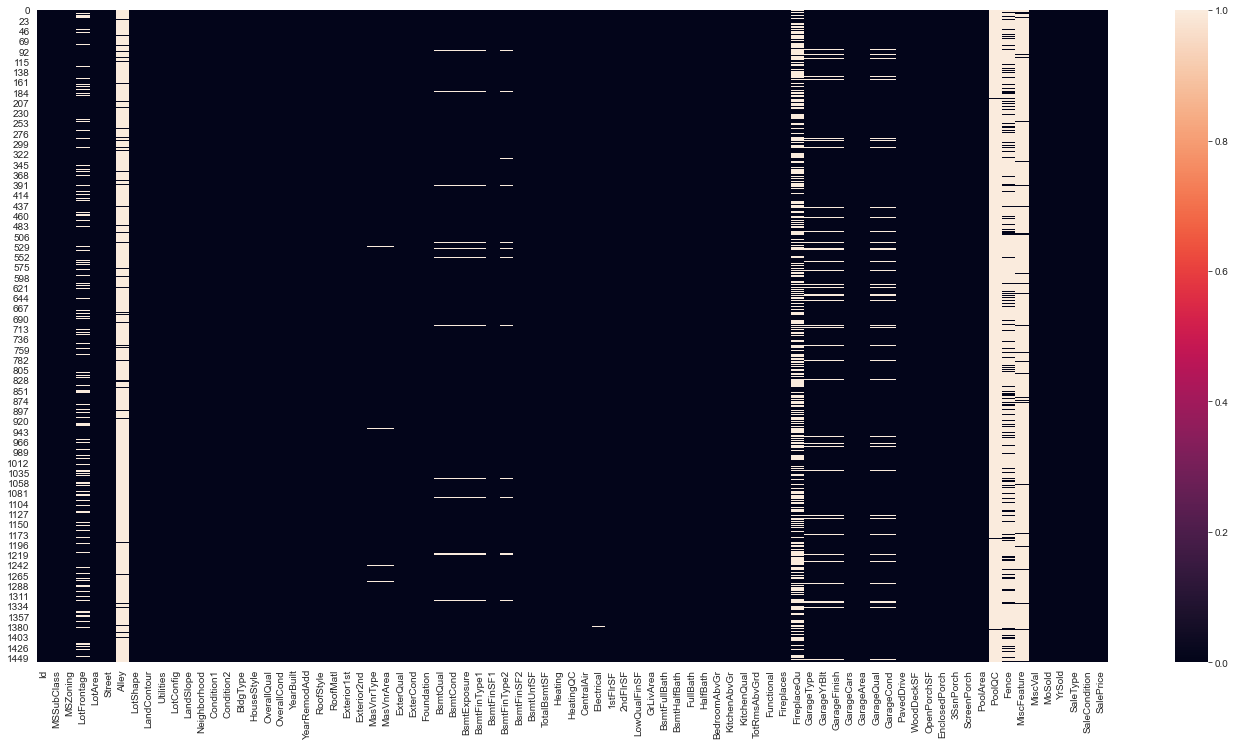

In [51]:
plt.figure(figsize=(24,12))
sns.heatmap(data.isnull())

Assessing each column in the dataframe to classify them as either sparse or non-sparse.

In [52]:
columns_to_drop = []
columns_to_model = []
non_sparse_column_percentage = 90 # The percentage of the column that has non-null values (i.e 50 = 50%)

# Loop through columns to assess if the column is a sparse column or not
for col in data.columns:
    if (data[data[col].notnull()][col].count())/(len(data))*100 != 100:
        print(f"{col}: {(data[data[col].notnull()][col].count())/(len(data))*100:.4f}%")
        if (data[data[col].notnull()][col].count())/(len(data))*100 < non_sparse_column_percentage:
            columns_to_drop.append(col)
        else:
            columns_to_model.append(col)
    else:
        columns_to_model.append(col)

LotFrontage: 82.2603%
Alley: 6.2329%
MasVnrType: 99.4521%
MasVnrArea: 99.4521%
BsmtQual: 97.4658%
BsmtCond: 97.4658%
BsmtExposure: 97.3973%
BsmtFinType1: 97.4658%
BsmtFinType2: 97.3973%
Electrical: 99.9315%
FireplaceQu: 52.7397%
GarageType: 94.4521%
GarageYrBlt: 94.4521%
GarageFinish: 94.4521%
GarageQual: 94.4521%
GarageCond: 94.4521%
PoolQC: 0.4795%
Fence: 19.2466%
MiscFeature: 3.6986%


Eliminating the sparse columns and null values.

In [53]:

data = data[columns_to_model]    


for col in columns_to_model:
    data = data[data[col].notnull()]

In [54]:
data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


### Test Dataset

<AxesSubplot:>

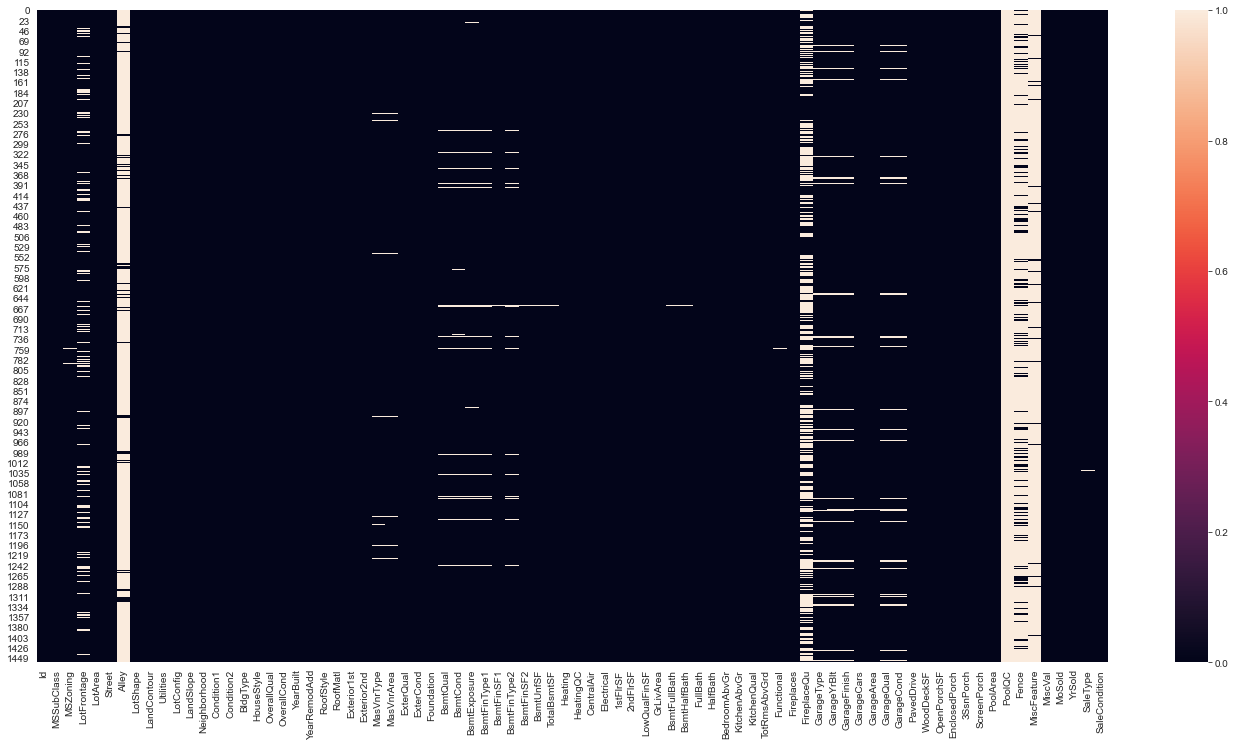

In [55]:
plt.figure(figsize=(24,12))
sns.heatmap(test_data.isnull())

In [56]:
for col in test_data.columns:
    if (test_data[test_data[col].notnull()][col].count())/(len(test_data))*100 != 100:
        print(f"{col}: {(test_data[test_data[col].notnull()][col].count())/(len(test_data))*100:.4f}%")

MSZoning: 99.7258%
LotFrontage: 84.4414%
Alley: 7.3338%
Utilities: 99.8629%
Exterior1st: 99.9315%
Exterior2nd: 99.9315%
MasVnrType: 98.9034%
MasVnrArea: 98.9719%
BsmtQual: 96.9842%
BsmtCond: 96.9157%
BsmtExposure: 96.9842%
BsmtFinType1: 97.1213%
BsmtFinSF1: 99.9315%
BsmtFinType2: 97.1213%
BsmtFinSF2: 99.9315%
BsmtUnfSF: 99.9315%
TotalBsmtSF: 99.9315%
BsmtFullBath: 99.8629%
BsmtHalfBath: 99.8629%
KitchenQual: 99.9315%
Functional: 99.8629%
FireplaceQu: 49.9657%
GarageType: 94.7910%
GarageYrBlt: 94.6539%
GarageFinish: 94.6539%
GarageCars: 99.9315%
GarageArea: 99.9315%
GarageQual: 94.6539%
GarageCond: 94.6539%
PoolQC: 0.2056%
Fence: 19.8766%
MiscFeature: 3.4955%
SaleType: 99.9315%


## Categorical and Numerical Features

In [57]:
numerical_features = []
categorical_features = []
for col in data:
    if (data[col].dtype == int) | (data[col].dtype == float):
        numerical_features.append(col)
    else:
        categorical_features.append(col)
print(f"Numerical features: {numerical_features}")
print(f"Categorical features {categorical_features}")

Numerical features: ['MasVnrArea', 'GarageYrBlt']
Categorical features ['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Misc

### Categorical Features

In [58]:
for feature in categorical_features:
    print(f"{feature}: (Unique Count = {len(data[feature].unique())})\n\n{data[feature].unique()}\n\n{'*'*75}")

Id: (Unique Count = 1338)

[   1    2    3 ... 1458 1459 1460]

***************************************************************************
MSSubClass: (Unique Count = 15)

[ 60  20  70  50 190  45 120  30  85  90  80 160  75 180  40]

***************************************************************************
MSZoning: (Unique Count = 5)

['RL' 'RM' 'C (all)' 'FV' 'RH']

***************************************************************************
LotArea: (Unique Count = 1000)

[  8450   9600  11250   9550  14260  14115  10084  10382   6120   7420
  11200  11924  12968  10652  10920  11241  13695   7560  14215   7449
   9742   4224   8246  14230   7200  11478  16321   6324   8500   8544
  11049  10552   7313  13418  10859   8532   7922   8658  16905   9180
   9200   7945   7658  12822  11096   7742  13869   6240   8472  50271
   7134  10175   2645  11645  13682  13072   6442  10300   9375   9591
  19900  10665   4608  15593  13651   7599  10141  10200   5790   1596
   8475   8635  1044

## Numerical Features that are Categorical

In [59]:
categorical_numerical_features = []
for feature in categorical_numerical_features:
    numerical_features.remove(feature)
    catergorical_features.append(feature)
    
print(f"Numerical features:\n {numerical_features}\n")
print(f"Categorical features\n {categorical_features}")

Numerical features:
 ['MasVnrArea', 'GarageYrBlt']

Categorical features
 ['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'M

<hr>

# Exploratory Data Analysis (EDA)

<AxesSubplot:>

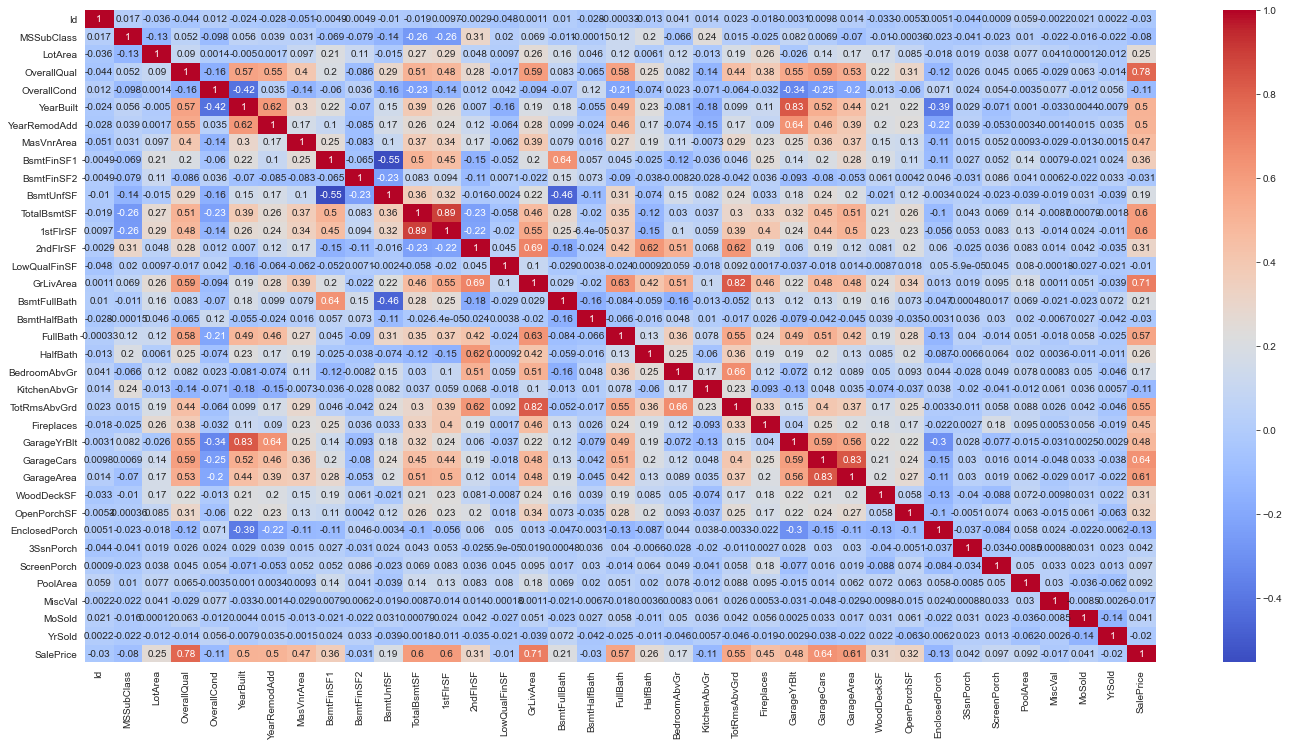

In [60]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

checking correlation with sales price

In [61]:
data.corr()[data.corr()['SalePrice']>0][['SalePrice']].sort_values(by='SalePrice',ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.783546
GrLivArea,0.711706
GarageCars,0.640154
GarageArea,0.607535
1stFlrSF,0.604714
TotalBsmtSF,0.602042
FullBath,0.569313
TotRmsAbvGrd,0.551821
YearBuilt,0.504297


##### Plotting Relationships between sales price and different features

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

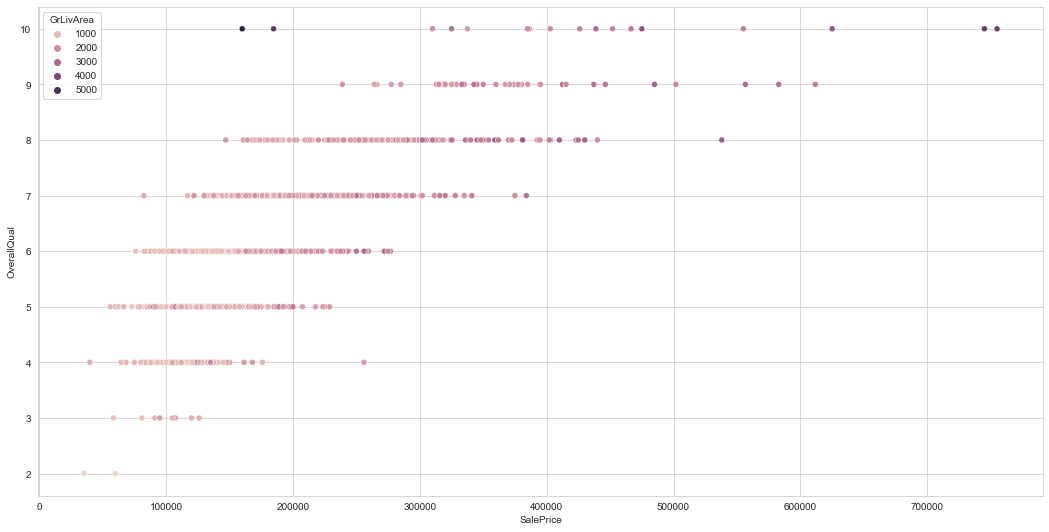

In [62]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=data,x='SalePrice',y='OverallQual',hue='GrLivArea')

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

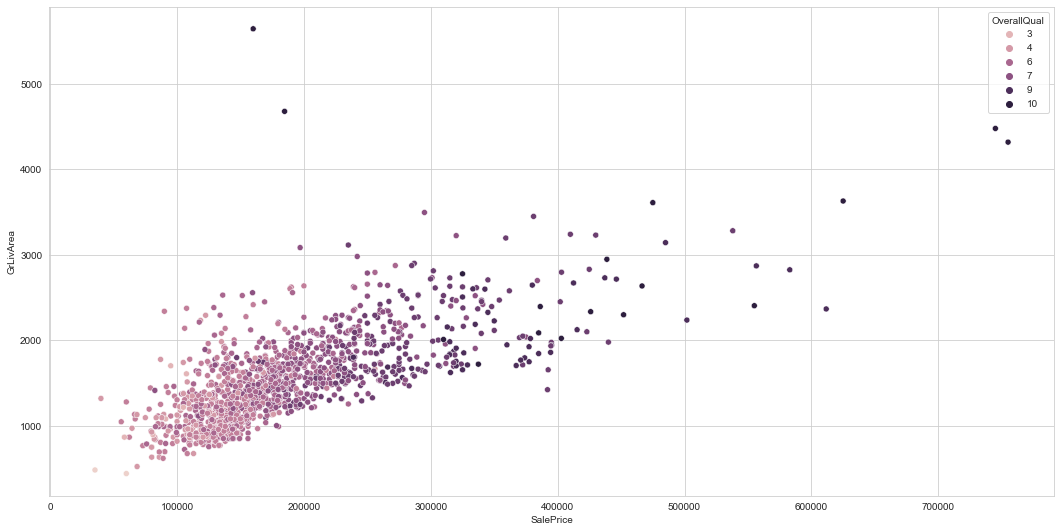

In [63]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=data,x='SalePrice',y='GrLivArea',hue='OverallQual')

<AxesSubplot:xlabel='SalePrice', ylabel='GarageCars'>

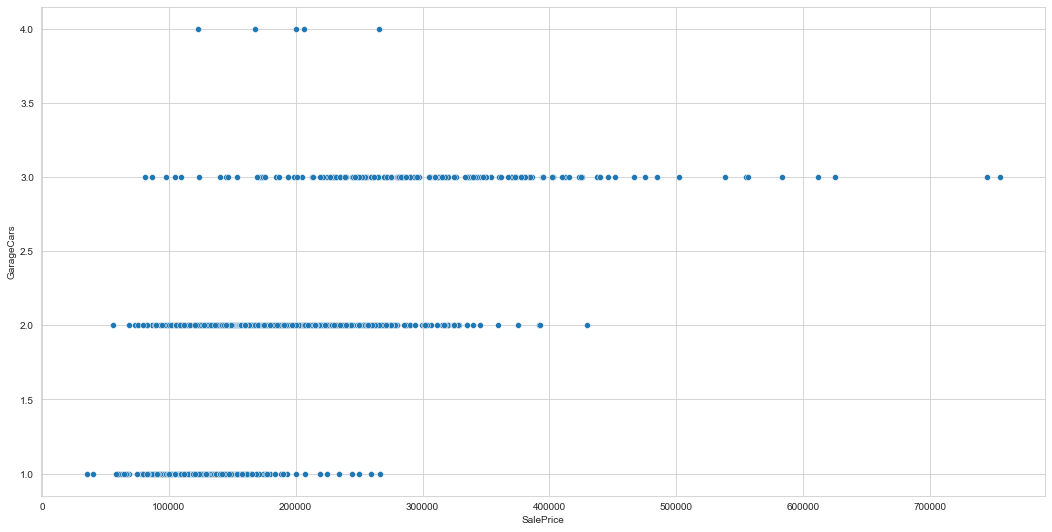

In [64]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=data,x='SalePrice',y='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='GarageArea'>

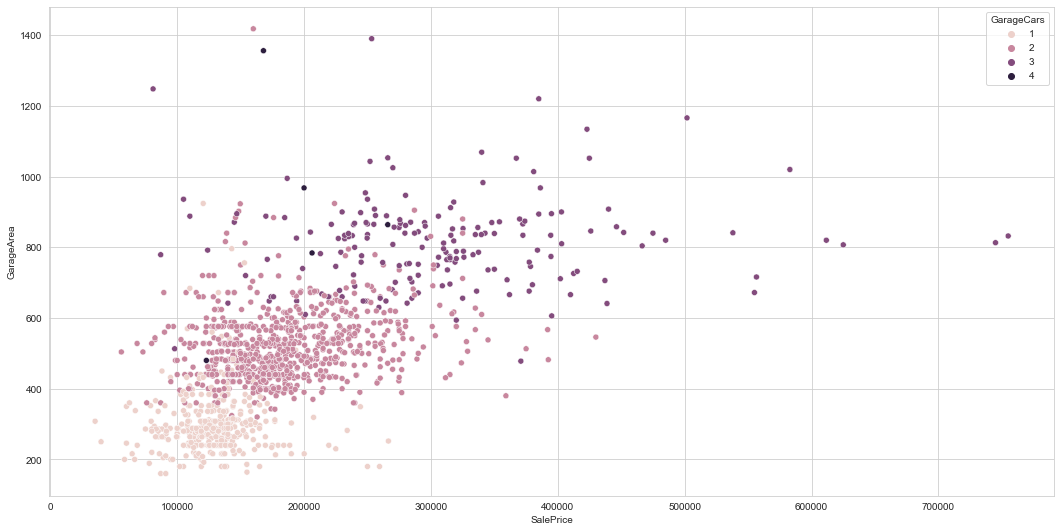

In [65]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=data,x='SalePrice',y='GarageArea',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='1stFlrSF'>

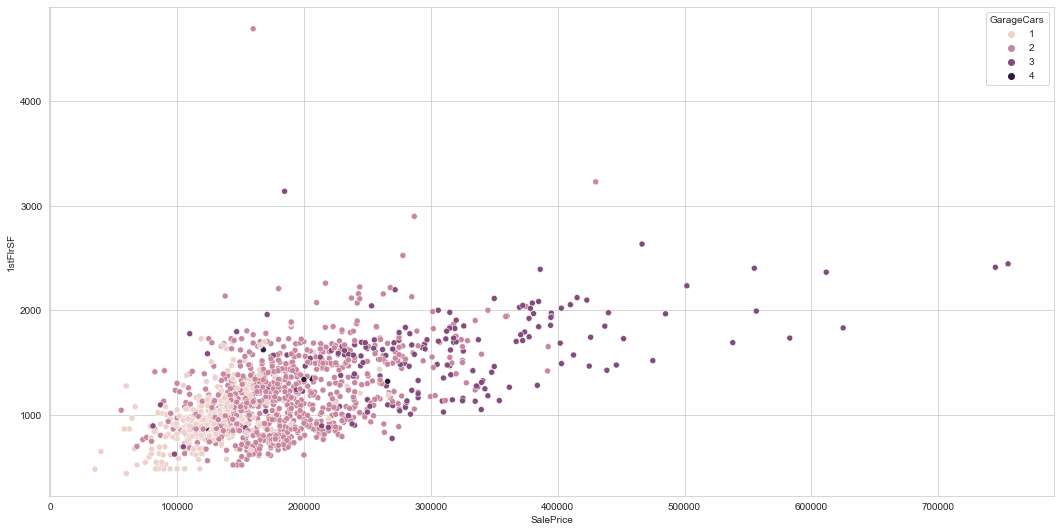

In [66]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=data,x='SalePrice',y='1stFlrSF',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

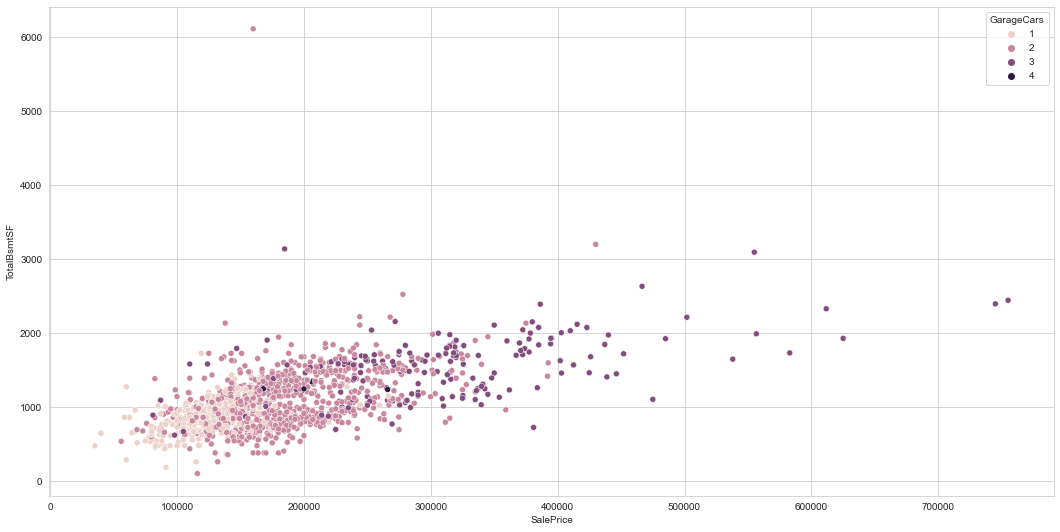

In [67]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=data,x='SalePrice',y='TotalBsmtSF',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='FullBath'>

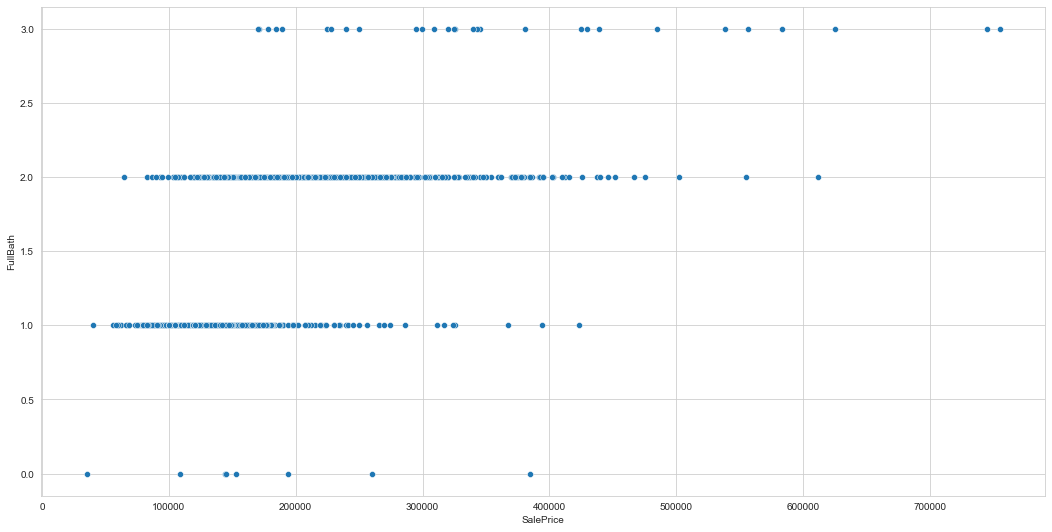

In [68]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=data,x='SalePrice',y='FullBath')

<AxesSubplot:xlabel='SalePrice', ylabel='TotRmsAbvGrd'>

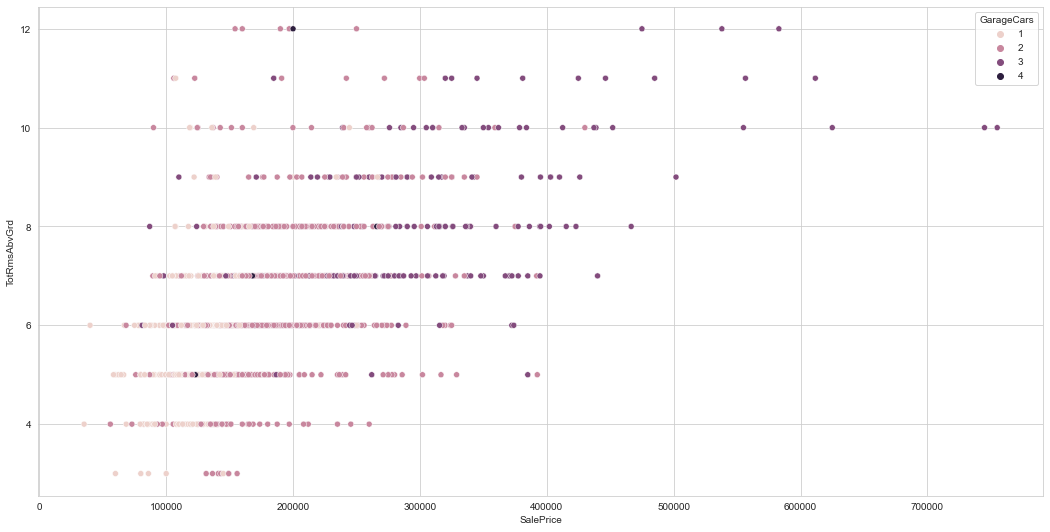

In [69]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=data,x='SalePrice',y='TotRmsAbvGrd',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='YearBuilt'>

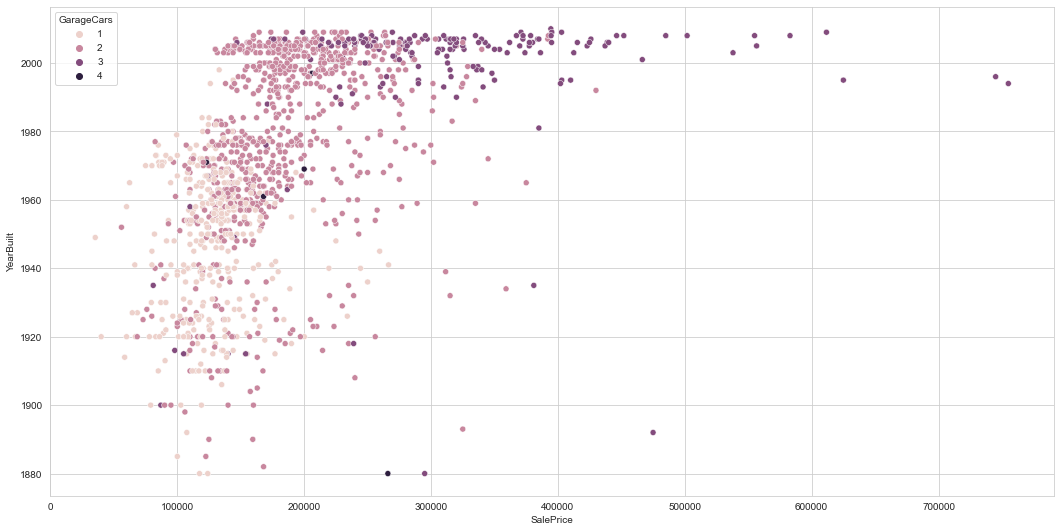

In [70]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=data,x='SalePrice',y='YearBuilt',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='YearRemodAdd'>

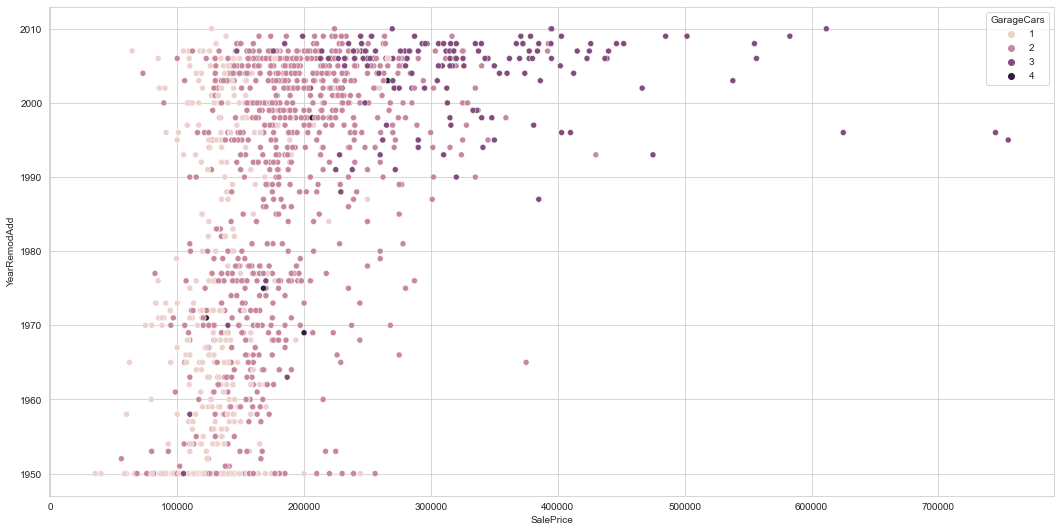

In [71]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=data,x='SalePrice',y='YearRemodAdd',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='GarageYrBlt'>

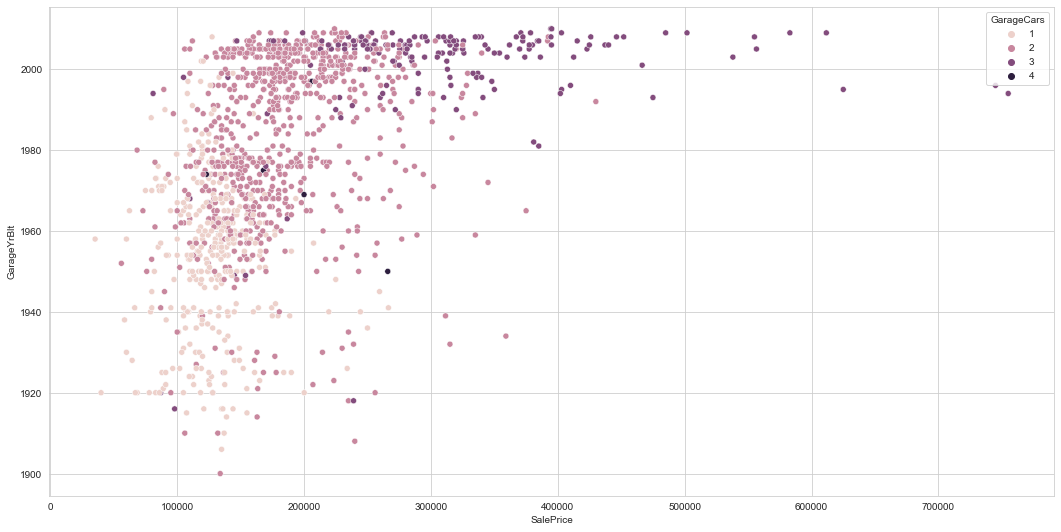

In [72]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=data,x='SalePrice',y='GarageYrBlt',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='MasVnrArea'>

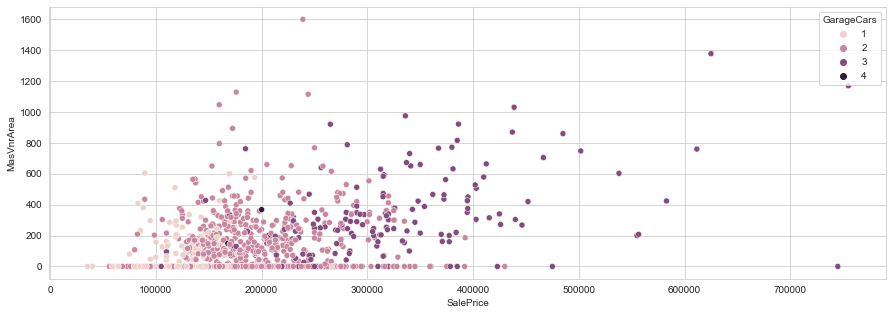

In [73]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='SalePrice',y='MasVnrArea',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='Fireplaces'>

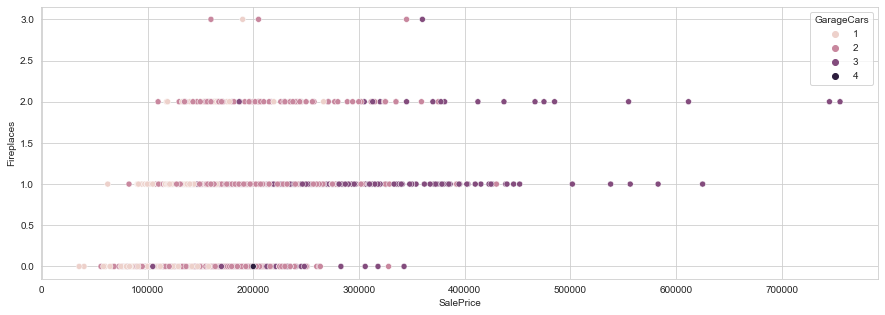

In [74]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='SalePrice',y='Fireplaces',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='BsmtFinSF1'>

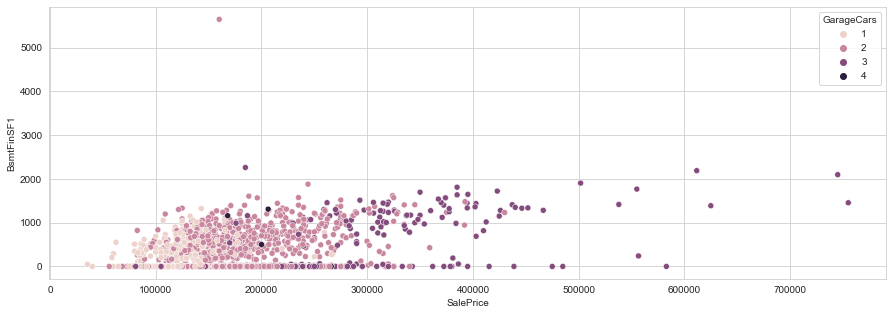

In [75]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='SalePrice',y='BsmtFinSF1',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='OpenPorchSF'>

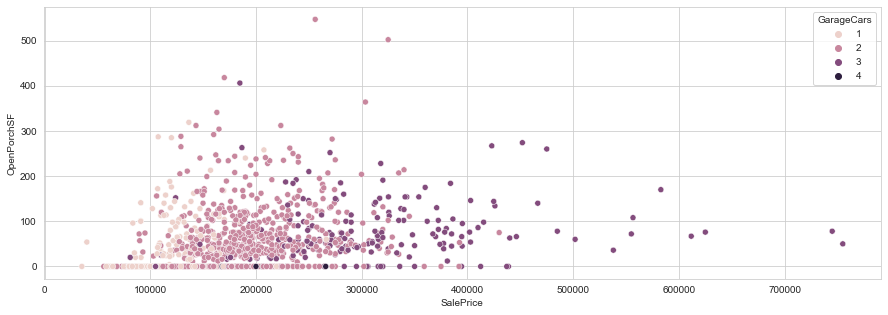

In [76]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='SalePrice',y='OpenPorchSF',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='2ndFlrSF'>

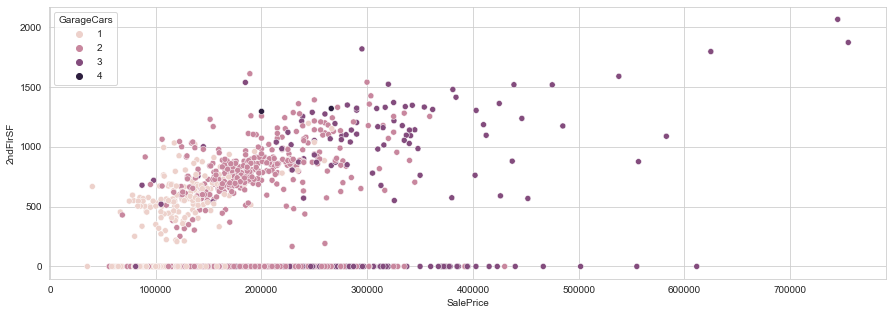

In [77]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='SalePrice',y='2ndFlrSF',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='WoodDeckSF'>

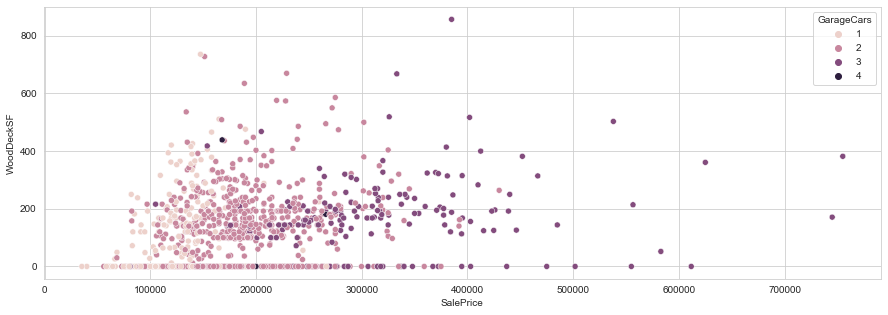

In [78]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='SalePrice',y='WoodDeckSF',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='HalfBath'>

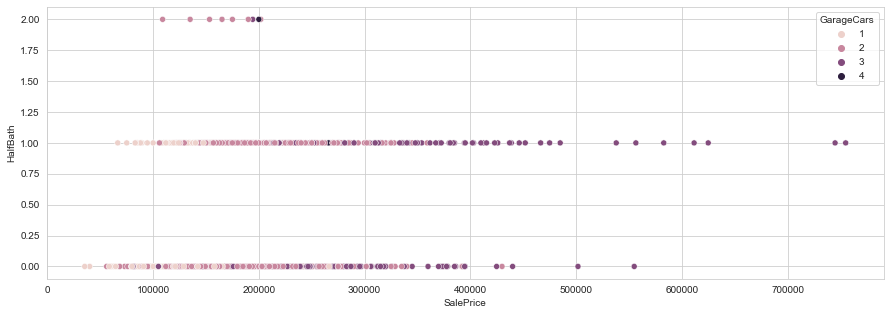

In [79]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='SalePrice',y='HalfBath',hue='GarageCars')

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

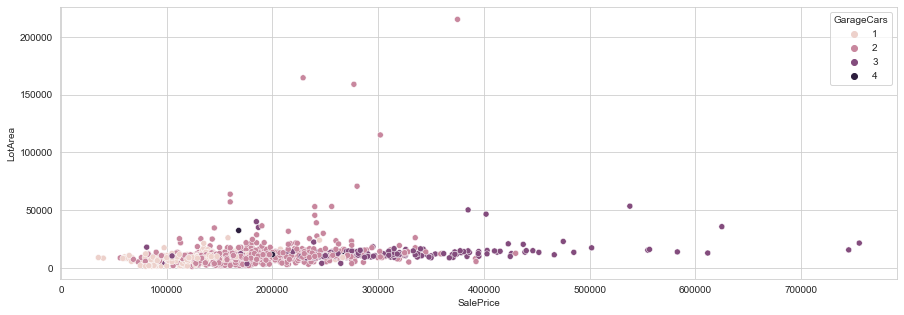

In [80]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='SalePrice',y='LotArea',hue='GarageCars')

<hr>

# Modeling

In [81]:
data = data[numerical_features]

## Splitting Training & Test Data

In [ ]:
X = data.drop(['Id','SalePrice'],axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Generating the Linear Regression Model

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

In [ ]:
prediction = lm.predict(X_test)

Text(0.5, 0, 'Actual')

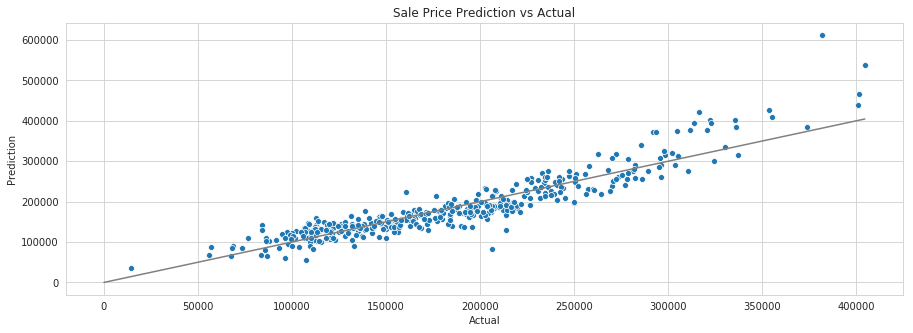

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(prediction,y_test)
sns.lineplot(x=np.linspace(0,max(prediction),100),y=np.linspace(0,max(prediction),100), color='grey') # Reference line for perfect prediction
plt.title('Sale Price Prediction vs Actual')
plt.ylabel('Prediction')
plt.xlabel('Actual')

In [ ]:
print(f"MAE: {metrics.mean_absolute_error(y_test,prediction):.4f}")
print(f"MSE: {metrics.mean_squared_error(y_test,prediction):.4f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test,prediction)):.4f}")
print(f"Explained Variance Score: {metrics.explained_variance_score(y_test,prediction):.4f}")

MAE: 20931.1787
MSE: 873688275.8611
RMSE: 29558.2184
Explained Variance Score: 0.8493
